# Statistics for Data Science 101

## Exploratory Data Analysis (EDA)

In [73]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Pearson Correlation Coefficient


In [48]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1], which the correlation (r)
    return corr_mat[0,1]


---------------------------
## Probavility Distributions
## Discrete variables
**Statistical inference** involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions. 

* **`np.random.random()`** returns random number from 0 to 1
    * **`size=n`** specifies the size of the array
    
    
* **`np.random.seed()`** specifying the seed generates the same pattern everytime

In [17]:
np.random.random(10)

array([0.09112212, 0.2502318 , 0.79822215, 0.68737302, 0.89575177,
       0.31766638, 0.47840612, 0.48434907, 0.58195345, 0.8511074 ])

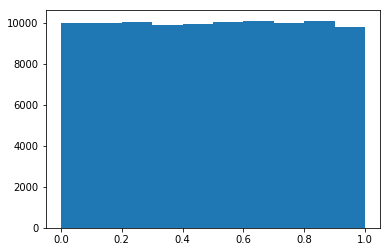

In [14]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram

### Random numbers and Bernoulli trials

**Bernoulli trial**: an experiment that has two options, "success" (True) and "failure" (False)

In [4]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes. if number is < p, it is success, otherwise
    it is failure"""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success+=1

    return n_success

**Example** Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is `p = 0.05`. Repeat it for 1000 iterations (Note: repeating the probability operation for a large number yields a probability distribution. Refer to `numpy` notebook) 

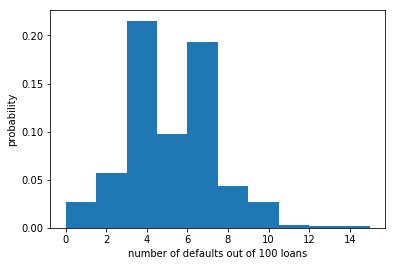

In [7]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

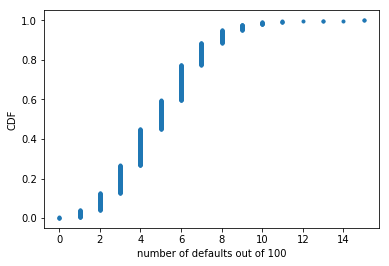

Probability of losing money = 0.022


In [9]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y, marker='.',linestyle='none')
plt.ylabel('CDF')
plt.xlabel('number of defaults out of 100')

plt.show()


# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

### The Binomial distribution

What we did in the example above is an example of **Probability Mass Function (PMF)**, which is defined as a set of probabilities of discrete outcomes. For example, flipping a coin.

**Binomial distribution**: The number $r$ of successes in $n$ Bernoulli trials with probability $p$ of success is Binomially distributed

* **`np.random.binomial()`** identical to `perform_bernoulli_trials` function defined up

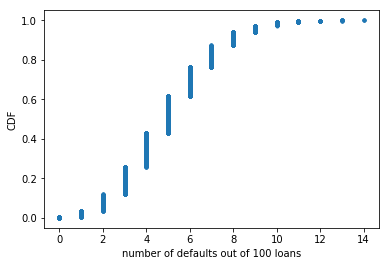

In [10]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults  = np.random.binomial(100,0.05,10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y, marker='.',linestyle='none')
plt.ylabel('CDF')
plt.xlabel('number of defaults out of 100 loans')

plt.show()

### Plotting the Binomail PMF

This will be done using the histogram. But we want the bins centered on the integers.

Refer to the documentation on `histograms` [here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html) to understand more about the process of defining the bins below

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5]


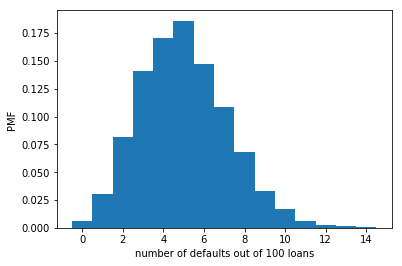

In [12]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
print(bins)

# Generate histogram
plt.hist(n_defaults,normed=True,bins=bins)

# Label axes
plt.ylabel('PMF')
plt.xlabel('number of defaults out of 100 loans')

# Show the plot
plt.show()

### Poisson distribtuion

**Poisson process**: timing of the next event is completely independent of when the previous event happened. Example: natural births in a given hospital, number of hits in a websites,..

**Poisson distribution**: The number $r$ of arrivals of a Poisson process in a given time interval with average rate of $\lambda$ arrivals per interval is Poisson distributed.

* **`np.random.poisson()`**

The poisson distribution is a limit of the Binomail distribution for low probability of success and large number of trials i.e. for rare events. The Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small which is a rare event).

Let's try to exaplain that in the example below with $np$=10

In [13]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
#for each pair n*p=10


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


-------------------
## Continuous variables
**Probability density function (PDF)** is a methematical description of the relative likelihood of observing a value of a continuous variable. The probability is measured by the area under the PDF curve.

Remember the **CDF** gives the probability (y-axis) that the variable is less than the value on the x-axis

* **`np.random.normal()`**
    * **`mean`**
    * **`std`**
    * **`size`**

### Plot the PDF
* **`plt.his()`**
    * **`normed=True`**
    * **`histtype='step'`**

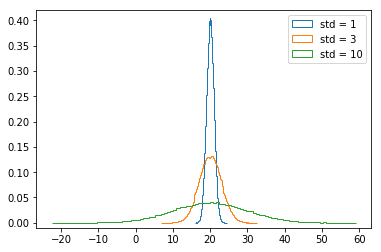

In [15]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1,100000)
samples_std3 = np.random.normal(20,3,100000)
samples_std10 = np.random.normal(20,10,100000)

# Make histograms
plt.hist(samples_std1, bins=100,normed=True,histtype='step')
plt.hist(samples_std3, bins=100,normed=True,histtype='step')
plt.hist(samples_std10, bins=100,normed=True,histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

Now plot their corresponding CDFs

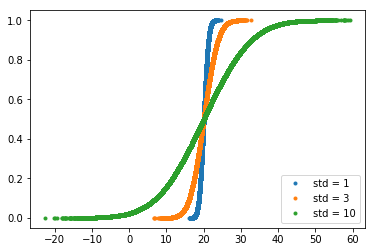

In [16]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.',linestyle='none')
plt.plot(x_std3, y_std3, marker='.',linestyle='none')
plt.plot(x_std10, y_std10, marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### Theoritical CDF and ECDF

In [19]:
data = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]

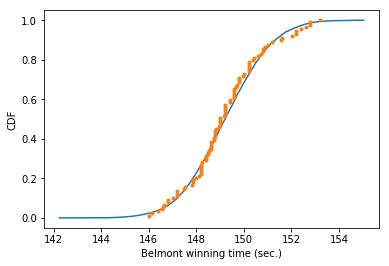

In [20]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(data)
sigma = np.std(data)


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor = ecdf(samples)

x,y = ecdf(data)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the data is Normally distributed since they are matching. If you chose the model that describes your data correctly, the "optimal" parameters are the ones extracted from the data. In the example above, it is the mean ($\mu$) and the standard deviation ($\sigma$) that were calculated from the data

What is the probability that the data is less than 144?

In [22]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu,sigma,1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob*100)

Probability of besting Secretariat: 0.062299999999999994


### The Exponential distribution

The waiting time between arrivals of a Poisson process is Exponentially distributed.

* **`np.random.exponential()`**
    * **`scale`**: the typical interval time $\tau$
    * **`size`**

The **`scale`** value could be taken from the data using the mean interval time between two arrivals.

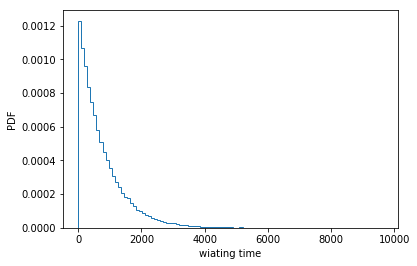

In [30]:
tau = 764 #average waiting time
t1 = np.random.exponential(tau, 100000)

# Make the histogram
plt.hist(t1,bins=100,normed=True,histtype='step')

# Label axes
plt.xlabel('wiating time')
plt.ylabel('PDF')


# Show the plot
plt.show()

---------------

## Linear Regression

### Linear regression by least squares

The goal is to find a linear function that best describes the data. The linear function has two parameters that we need to find; slope and intercept

* **`slope, intercept = np.polyfit()`**
    * **`x value`**
    * **`y value`**
    * **`degree`** for linear functions the degree is 1
This function gets the *optimal* slope and intercept by minimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Residual is defined as the distance between the point and the line. Obviously, it must be minimal

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


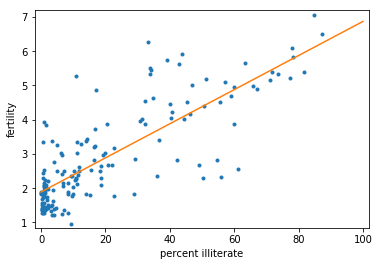

0.8041324026815341

In [96]:
# data from variables.py in directory
from variables import illiteracy, fertility

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100]) #array of values 0 and 100
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

# Show the Pearson correlation coefficient
r = np.corrcoef(illiteracy, fertility)[0,1]
r

---------------------

## Parametric Estimation
### Bootstrapping

* **Bootstrapping**: the use of resampled data to perfrorm statistical inference.
* **Bootstrap sample**: resampled array of data
* **Bootstrap replicate**: a statistic comupted from a resampled array

* **`np.random.choice()`** generates a random sample of the array
    * **`input array`**
    * **`size`** decides the size of array in the output

In [13]:
np.random.choice([1,0,-1],size=3)

array([1, 1, 0])

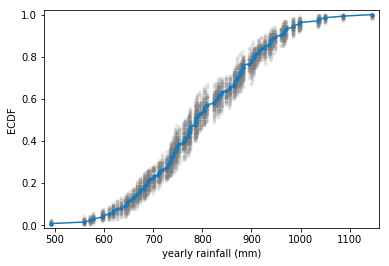

In [10]:
#import data from variables.py
from variables import rainfall

# generate 50 boostraps
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread

### Convidence interval of Bootsrap

If we repeated measurements over and over again, $p$% of the observed values would lie between $p$% confidence interval.

Below, we define two functions to generate the bootstrap replicates we need of the statistical interence we need to measure. In this example it is the mean. Over repeated computations, the distribution of the mean will be investigated. The standard deviation of this distribution, called the **standard error of the mean**, or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points

In [86]:
# define the bootsrap function. 

def bootstrap_replicate_1d(data,func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample = np.random.choice(data,size=len(data))
    return func(bs_sample)

In [87]:
# define bootstrap replicas function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

10.510549150506188
10.485670901926776


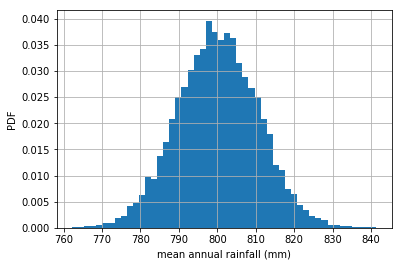

In [15]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.mean,10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.grid()
plt.show()

Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

**Confidence interval**: upper and lower bounds on the range of parameter values that you might expect if you repeat the measrurement

* **`np.percentile()`**


In [20]:
# 95% confidence interval
np.percentile(bs_replicates,[2.5, 97.5])

array([779.54052632, 820.64197368])

Now get the bootstrap replicates of the variance

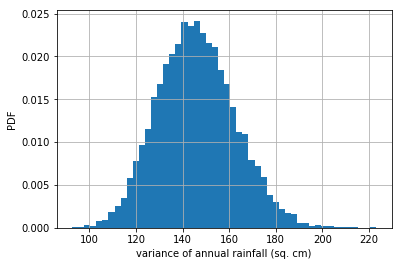

In [22]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall,np.var,10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, normed=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.grid()
plt.show()

This is not normally distributed, as it has a longer tail to the right

In [23]:
# confidence interval of variance
np.percentile(bs_replicates,[2.5, 97.5])

array([115.50598475, 180.02114874])

### Pair bootstrap
Pair bootstrap involves resampling pairs of data, since **`np.random.choice`** only resamples one array, we will perform resampling on the indeces.

The below example performs `pair bootstrap` for the slope and intercept using the function `np.polyfit`, you can replace the function with anything you want.

In [89]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Convert x and y to arrays to be able to sort them with new array
    # of indices
    x = np.array(x)
    y = np.array(y)

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[0.04411724 0.05584361]


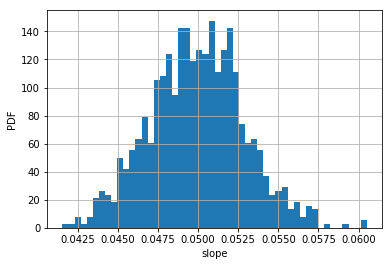

In [70]:
#import variables from .py file in directory
from variables import illiteracy,fertility

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy,fertility,1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.grid()
plt.show()

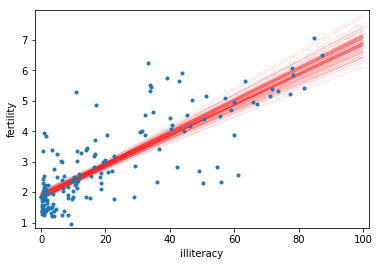

In [71]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines (100 lines)
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy,fertility,marker='.',linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

---------------
## Hypothesis Testing
* **Hypothesis testing**: Assessment of how reasonable the observed data are assuming a hypothesis is true
* **Null hypothesis**: the hypothesis you are testing
* **Permutation** random ordering of entries in an array

The steps of simulating the hypothesis that two variables have identical probability distribution:
1. Concatenate both variables
2. Generate a perumtation sample (scrambling the contents of the concatenated array)
3. Split the permuatation sample back according to the original number of samples of each variable


* **`np.random.permutation()`**

In [3]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In this example we will perform hypothesis testing between two variables `rain_june` and `rain_november` (a wet month and a dry month). Let's see if both follow the same probability distribution

In [4]:
# import variables from variables.py
from variables import rain_june, rain_november

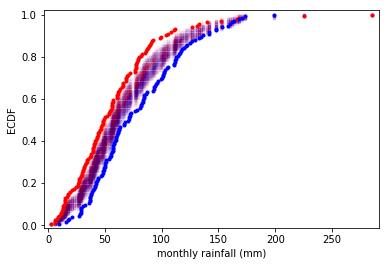

In [5]:
for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june,rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

 Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. July and November rainfall are not identically distributed

### Test statistic and p-values

**Test statistic**: A single number that can be computed from observed data and from data you simulate under the null hypothesis. It serves as a basis of comparison between the two.

**p-value**: The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true. If the value is small, it is said that the data are statistically significantlly different.

**Permuatation replicate** a single value of a statistic computed from a permutation sample

In the example below, we will use frog force data between two frogs, A and B, and we will test the hypothesis that the two frogs have the same distribution of impact forces 

In [6]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size) :
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [14]:
# import data
df = pd.read_csv('frog_force.csv',header=14)
df = df[['ID','impact force / body weight']]
df.head()

,ID,impact force / body weight
0,A,1.95
1,A,4.08
2,A,2.82
3,A,2.51
4,A,0.80


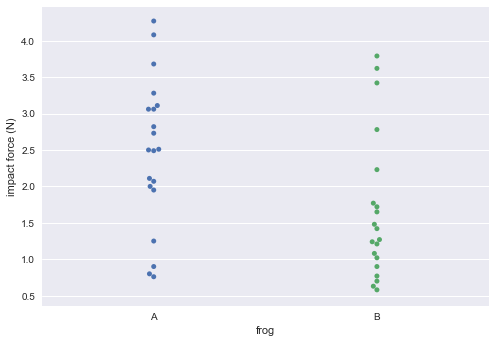

In [18]:
# first let's do some EDA
import seaborn as sns

# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact force / body weight',data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.style.use('seaborn')
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

This is an example of an **A/B Testing**, where a change is strategy is studied to see if that change gives better results

In [ ]:
# extract the data
force_a = df[df['ID']=='A'].loc[:,'impact force / body weight']
force_a = list(force_a)

force_b = df[df['ID']=='B'].loc[:,'impact force / body weight']
force_b = list(force_b)
force_b

In [32]:
# perform permutation test (hypothesis test)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0072


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same

### Bootstrap hypothesis tests

**pipeline for hypothesis testing**
1. Clearly state the null hypothesis
2. Define your test statistic
3. Generate many sets of simulated data assuming the null hypothesis is true
4. Compute the test statistic for each simulated data set
5. Compute p-value

#### A one-sample bootstrap hypothesis test
Comparing data sets to a single value.

In the frog force example we did before, assume a thrid frog C was studied and you only have their mean data available, you do not have frog C's impact force. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C. Mean force of Frog C is 2.03.

In [45]:
# Make an array of translated impact forces; force mean force_b to be equal to mean force_c: translated_force_b
translated_force_b = force_b-np.mean(force_b)+2.03

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0411


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

**NOTE** we used `<=` because the experimented value of force_b was less than the mean value of force_c

#### A two-sample bootstrap hypothesis test
Comparing two data sets together

We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [47]:
# concatenate both arrays
forces_concat = np.concatenate((force_a,force_b))

# compute the emperical diff means
empirical_diff_means = diff_of_means(force_a,force_b)

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0028



### Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [50]:
# import data
from variables import illiteracy, fertility

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy,fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted,fertility)

# Compute p-value: p
p = p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)

print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

---------------
## Case Study

You will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

### Part1. Prepare the data

The data are stored in two files, one files contains the data of 1975, and the other one for 2012. The first step will be to combine the data together and filter one `scandens` species for this exercise

In [59]:
# read the files

beak_1975 = pd.read_csv('finch_beak_1975.csv')
beak_2012 = pd.read_csv('finch_beak_2012.csv')


beak_1975['year']=1975
beak_2012['year']=2012


beak_1975.head()

,band,species,"Beak length, mm","Beak depth, mm",year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [60]:
beak_2012.head()

,band,species,blength,bdepth,year
0,19022,fortis,10.0,8.5,2012
1,19028,fortis,12.5,8.9,2012
2,19032,fortis,9.3,7.5,2012
3,19041,fortis,10.3,9.6,2012
4,19044,fortis,11.0,9.2,2012


In [63]:
beak_1975.columns = ['band','species','blength','bdepth','year']
beak_1975.head()

,band,species,blength,bdepth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [70]:
beak_years = pd.concat([beak_1975,beak_2012],ignore_index=True)
beak_years.head()

,band,species,blength,bdepth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


In [71]:
# filter out the finch species
beak_finch = beak_years[beak_years.species=='scandens']
beak_finch.tail()

,band,species,blength,bdepth,year
646,21295,scandens,14.2,9.3,2012
647,21297,scandens,13.0,9.8,2012
648,21340,scandens,14.6,8.9,2012
649,21342,scandens,13.1,9.8,2012
650,21347,scandens,15.2,9.1,2012


In [83]:
# constuct the arrays of interest

# beak depth
bd_1975 = beak_finch.loc[beak_finch.year==1975,'bdepth']
bd_2012 = beak_finch.loc[beak_finch.year==2012,'bdepth']
bd_1975 = list(bd_1975)
bd_2012 = list(bd_2012)

#beak length
bl_1975 = beak_finch.loc[beak_finch.year==1975,'blength']
bl_2012 = beak_finch.loc[beak_finch.year==2012,'blength']
bl_1975 = list(bl_1975)
bl_2012 = list(bl_2012)

### Part2. Perform EDA

1. Use swarmplot
2. Use ECDF

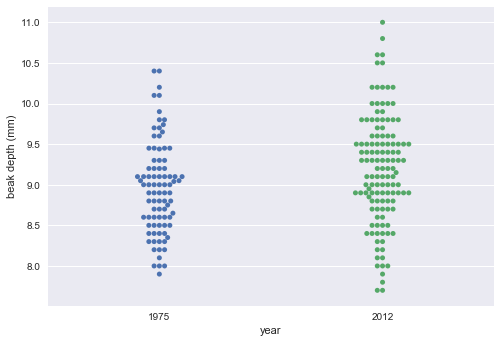

In [75]:
# Create bee swarm plot
_ = sns.swarmplot(x='year',y='bdepth',data=beak_finch)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

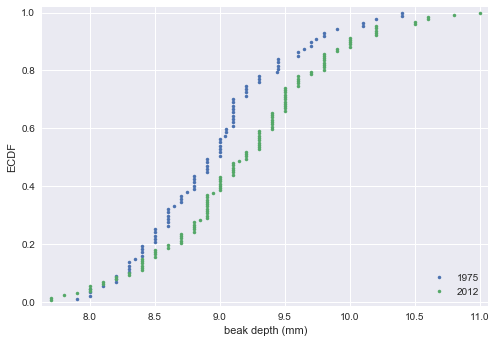

In [80]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

### Part3. Parameter estimation

Estimate the _difference of the mean_ beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [81]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05917506 0.39114947] mm


### Part4. Hypothesis test: Are beaks deeper in 2012?

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [82]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0033


We get a p-value of 0.0034, which suggests that there is a statistically significant difference.


### Part5. Study Relationships using EDA

In this section, the variations of the beak length and beak depth is investigated over time. Let's see if both changed by the same rate (this means the same shape but bigger), or one changed higher than the other (this means different shape). We begin with some EDA between the two variables

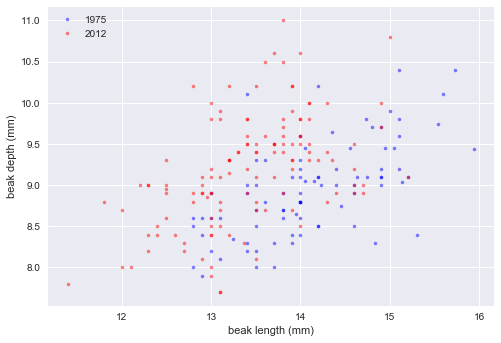

In [84]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Step6. Pair Bootstrapping

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [90]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975,bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012,bd_2012,1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975,bd_1975,1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012,bd_2012,1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5,97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5,97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5,97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5,97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.34285029 0.58956656]
1975: intercept = 2.3908752365842267 conf int = [0.6019609 4.1172365]
2012: slope = 0.462630358835313 conf int = [0.34494647 0.60823046]
2012: intercept = 2.9772474982360198 conf int = [1.01232845 4.52753825]


It looks like they have the same slope, but different intercepts.

### Step7. Linear Regressions

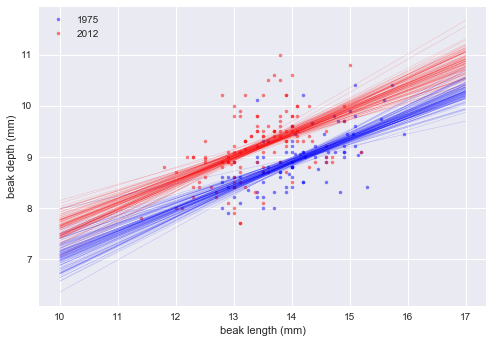

In [91]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines, they should consist of 10 mm and 17 mm: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x+bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x+bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years.

### Step8. Perform parametric estimation of the length-to-depth ratio

Since we are interested in the shape of the beak, we will compare the ratio of beak length to beak depth. We will perform parametric estimation for the ratio

In [93]:
# Compute length-to-depth ratios
ratio_1975 = np.array(bl_1975)/np.array(bd_1975)
ratio_2012 = np.array(bl_2012)/np.array(bd_2012)

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012,np.mean,10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55668304 1.60108256]
2012: mean ratio = 1.4658342276847767 conf int = [1.44418987 1.48815901]


The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.